In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap3
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import torch

In [3]:
import importlib
import d2l.regression.model as regression
from d2l.regression.model import LinearRegression, LinearRegressionL2
from d2l.regression.dataset import SyntheticRegressionDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import Evaluator
from matplotlib import pyplot as plt
from d2l.base.plot import plot_losses
from d2l.base.optimizer import SGDOptimizer

importlib.reload(regression)

<module 'd2l.regression.model' from '/Users/jinceyang/Desktop/codebase/ml/learn_d2l/d2l/regression/model.py'>

In [4]:
rng = torch.Generator().manual_seed(42)

In [5]:
w = torch.ones(200) * 0.01
b = torch.ones(1) * 0.05

In [6]:
reg_data = SyntheticRegressionDataset(w=w, b=b, rng=rng, num_train=20, num_test=200)

In [7]:
model = LinearRegression(num_features=200, rng=rng)
model_l2 = LinearRegressionL2(num_features=200, weight_decay=3, rng=rng)

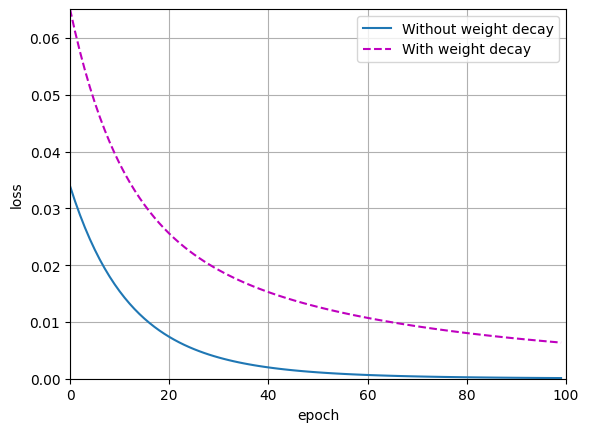

In [8]:
trainer = Trainer(model=model, optimizer=SGDOptimizer(model.parameters(), lr=0.003))
trainer_l2 = Trainer(model=model_l2, optimizer=SGDOptimizer(model_l2.parameters(), lr=0.003))
all_epochs_losses = trainer.train(reg_data.get_train_dataloader_epochs(32, 100))
all_epochs_losses_l2 = trainer_l2.train(reg_data.get_train_dataloader_epochs(32, 100))
fig, ax = plt.subplots()
plot_losses(ax, [all_epochs_losses, all_epochs_losses_l2], labels=['Without weight decay', 'With weight decay'])

In [9]:
evaluator = Evaluator(model=model)
evaluator_l2 = Evaluator(model=model_l2)
mse = evaluator.loss(reg_data.get_test_dataloader(batch_size=reg_data.num_test))
mse_l2 = evaluator_l2.loss(reg_data.get_test_dataloader(batch_size=reg_data.num_test))

print(f"Test MSE without L2 regularization: {mse:.6f}")
print(f"Test MSE with L2 regularization: {mse_l2:.6f}")

Test MSE without L2 regularization: 0.020151
Test MSE with L2 regularization: 0.017209
